In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
## Display all the columns of the dataframe

pd.pandas.set_option('display.max_columns',None)

In [83]:
df=pd.read_csv("SBI Life insurance.csv")

In [84]:
#Display the first 5 dataset
df.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [8]:
#Display the last 5 dataset
df.tail()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
1333,50,1,30.97,3,0,1,10600.5483,0
1334,18,0,31.92,0,0,0,2205.9808,1
1335,18,0,36.85,0,0,2,1629.8335,1
1336,21,0,25.80,0,0,3,2007.9450,0
1337,61,0,29.07,0,1,1,29141.3603,1


In [157]:
#info of data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 1337
Data columns (total 7 columns):
age         1309 non-null int64
sex         1309 non-null int64
bmi         1309 non-null float64
children    1309 non-null int64
smoker      1309 non-null int64
region      1309 non-null int64
charges     1309 non-null float64
dtypes: float64(2), int64(5)
memory usage: 121.8 KB


its show the number of rows, number of columns ,data types information,Memory usage,number of null values in each columns

In [159]:
#show the datapyes
df.dtypes

age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region        int64
charges     float64
dtype: object

All the data are ijn int and float not a categorical data 

In [160]:
#check the variance
df.var()

age         1.983984e+02
sex         2.501840e-01
bmi         3.570445e+01
children    1.264786e+00
smoker      1.615842e-01
region      1.221106e+00
charges     1.377846e+08
dtype: float64

after seen the dataset there is no case of low variance

In [161]:
#check the skewness in the data
df.skew()

age         0.051340
sex        -0.010708
bmi         0.191432
children    0.738119
smoker      1.482731
region     -0.023027
charges     1.437160
dtype: float64

its clearly visible data is -ve and +ve skewd

In [164]:
#To check the missing values in the dataset
df.isnull().values.any()

False

its show that there are no null values(missing values)

In [165]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [167]:
#percentage of missing values in each variables
df.isnull().sum()/len(df)*100

age         0.0
sex         0.0
bmi         0.0
children    0.0
smoker      0.0
region      0.0
charges     0.0
dtype: float64

its shows that the percentage of null values(missing values) of each columns of dataset and result is zero

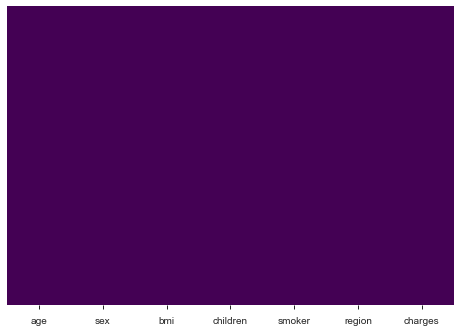

In [168]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [9]:
#five point of the summary
df.describe()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265,0.585202
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237,0.492871
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150,0.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000,1.000000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515,1.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010,1.000000


In [163]:
import pandas_profiling as pp
pp.ProfileReport(df)

### Univariate Analysis

In [10]:
# list of numerical variables
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
df[numerical_features].head()

Number of numerical variables:  8


,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


Text(0.5, 1.0, 'charges vs age')

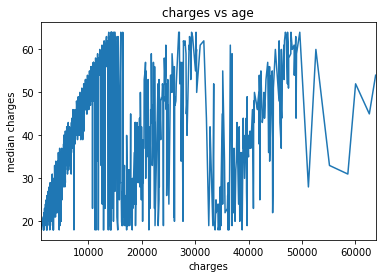

In [11]:
## Lets analyze the charges Variables
## We will check whether there is a relation between charges and age

df.groupby('charges')['age'].median().plot()
plt.xlabel('charges')
plt.ylabel('median charges')
plt.title("charges vs age")

In [12]:
## Numerical variables are usually of 2 type
## 1. Continous variable and Discrete Variables

discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<25 and feature not in ['insuranceclaim']]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 4


In [22]:
discrete_feature

['sex', 'children', 'smoker', 'region']

In [14]:
df[discrete_feature].head()

,sex,children,smoker,region
0,0,0,1,3
1,1,1,0,2
2,1,3,0,2
3,1,0,0,1
4,1,0,0,1


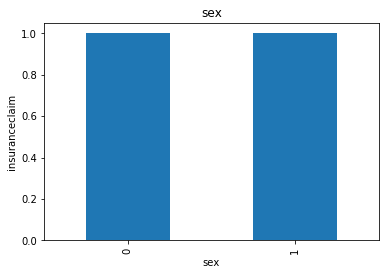

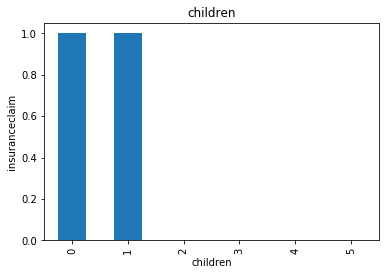

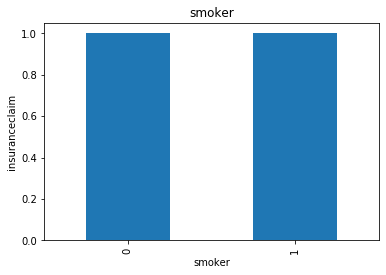

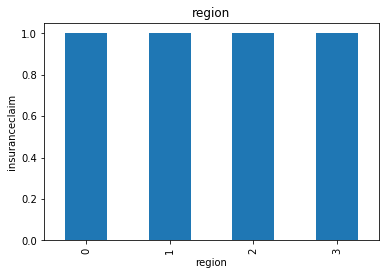

In [15]:
## Lets Find the realtionship between them and nsuranceclaim

for feature in discrete_feature:
    data=df.copy()
    data.groupby(feature)['insuranceclaim'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('insuranceclaim')
    plt.title(feature)
    plt.show()

### Continous variables

In [16]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature+['insuranceclaim']]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 3


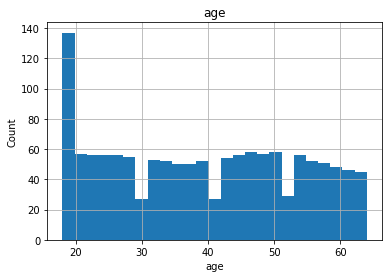

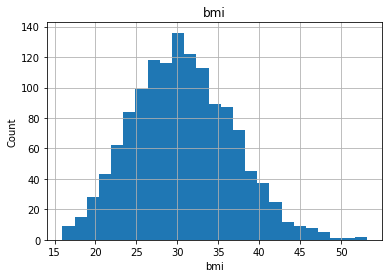

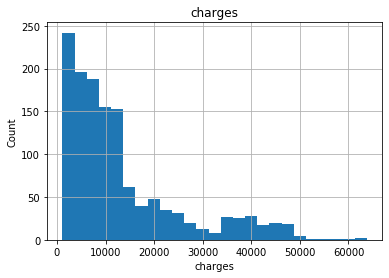

In [17]:
## Lets analyse the continuous values by creating histograms to understand the distribution

for feature in continuous_feature:
    data=df.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys


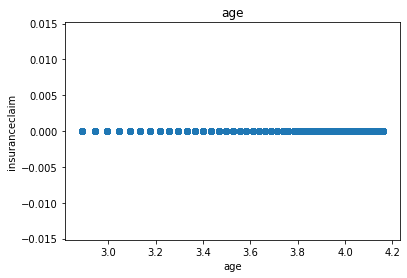

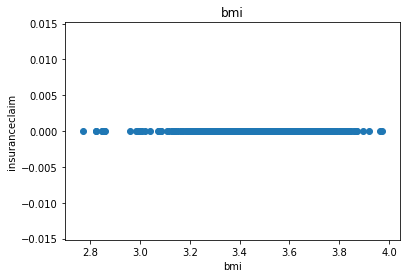

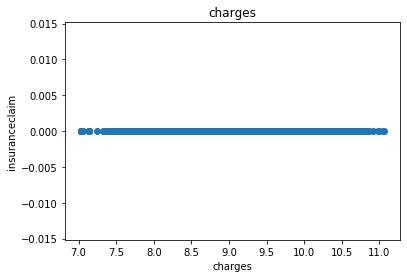

In [18]:
for feature in continuous_feature:
    data=df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data['insuranceclaim']=np.log(data['insuranceclaim'])
        plt.scatter(data[feature],data['insuranceclaim'])
        plt.xlabel(feature)
        plt.ylabel('insuranceclaim')
        plt.title(feature)
        plt.show()

### Outliers

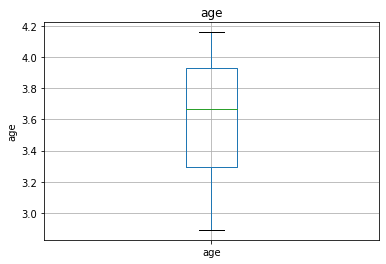

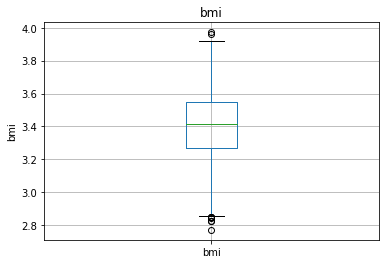

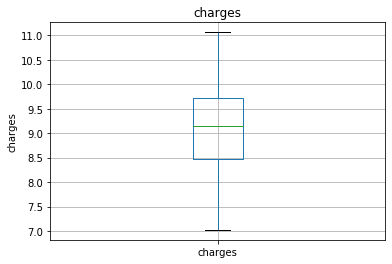

In [19]:
for feature in continuous_feature:
    data=df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

In [23]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'insuranceclaim'],
      dtype='object')

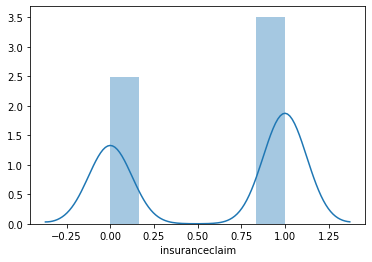

In [25]:
#histogram
sns.distplot(df['insuranceclaim']);

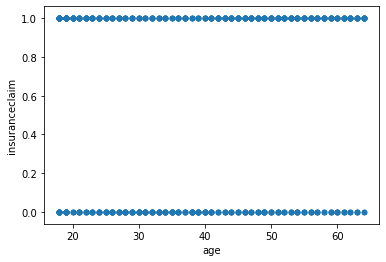

In [26]:
#scatter plot Length/Rings
var = 'age'
data = pd.concat([df['insuranceclaim'], df[var]], axis=1)
data.plot.scatter(x=var, y='insuranceclaim');


In [43]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'insuranceclaim'],
      dtype='object')

[0.16591928 0.10463378 0.08146487 0.09566517 0.07623318 0.10239163
 0.10762332 0.08520179 0.09566517 0.08520179]
[18.  22.6 27.2 31.8 36.4 41.  45.6 50.2 54.8 59.4 64. ]


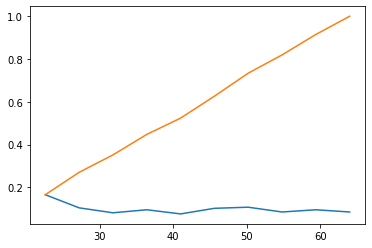

In [44]:
#Plot CDF of Maths
counts, bin_edges = np.histogram(df['age'],bins=10,density=True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf=np.cumsum(pdf)#cumsum is basicly cumulative sum
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

plt.show();

[0.40059791 0.29745889 0.09641256 0.06427504 0.02615845 0.04409567
 0.0426009  0.02391629 0.00149477 0.00298954]
[ 1121.8739    7386.729311 13651.584722 19916.440133 26181.295544
 32446.150955 38711.006366 44975.861777 51240.717188 57505.572599
 63770.42801 ]


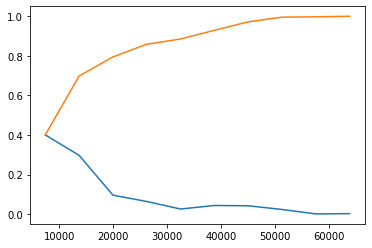

In [45]:
#Plot CDF of Maths
counts, bin_edges = np.histogram(df['charges'],bins=10,density=True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf=np.cumsum(pdf)#cumsum is basicly cumulative sum
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

plt.show();

In [46]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'insuranceclaim'],
      dtype='object')

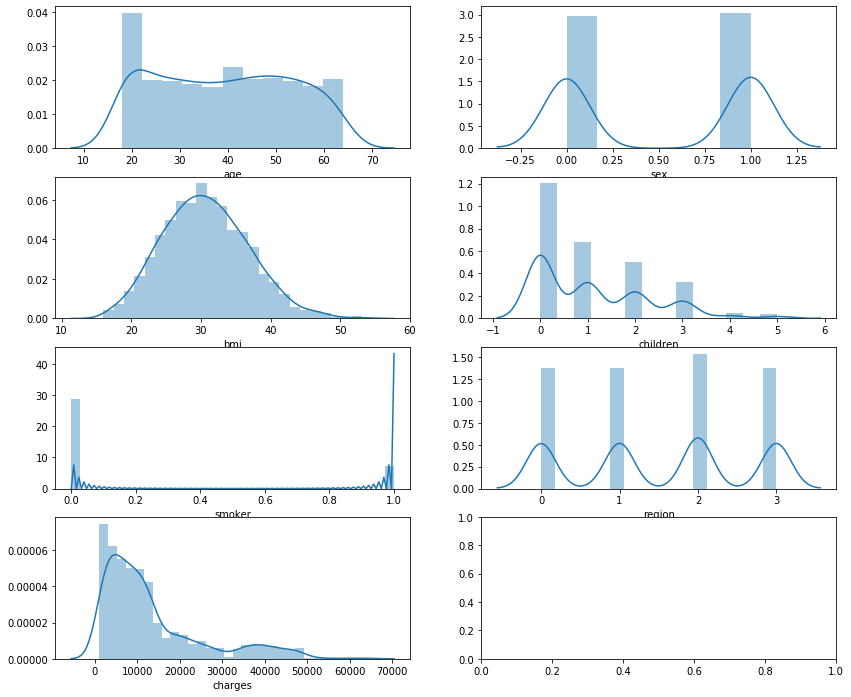

In [52]:
fig,ax2 = plt.subplots(4,2, figsize=(14,12))
sns.distplot(df['age'],ax=ax2[0][0])
sns.distplot(df['sex'],ax=ax2[0][1])
sns.distplot(df['bmi'],ax=ax2[1][0])
sns.distplot(df['children'],ax=ax2[1][1])
sns.distplot(df['smoker'],ax=ax2[2][0])
sns.distplot(df['region'],ax=ax2[2][1])
sns.distplot(df['charges'],ax=ax2[3][0])

In [78]:
# corrlation matrix
cor=df.corr()
cor

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008,0.113723
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292,0.031565
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341,0.384198
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998,-0.409526
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251,0.333261
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208,0.020891
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000,0.309418
insuranceclaim,0.113723,0.031565,0.384198,-0.409526,0.333261,0.020891,0.309418,1.000000


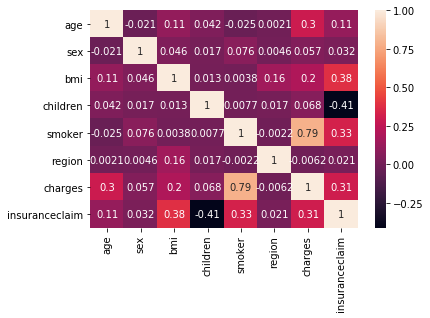

In [79]:
# correlation plot---heatmap
sns.heatmap(cor,annot=True)

### Bivariate Analysis

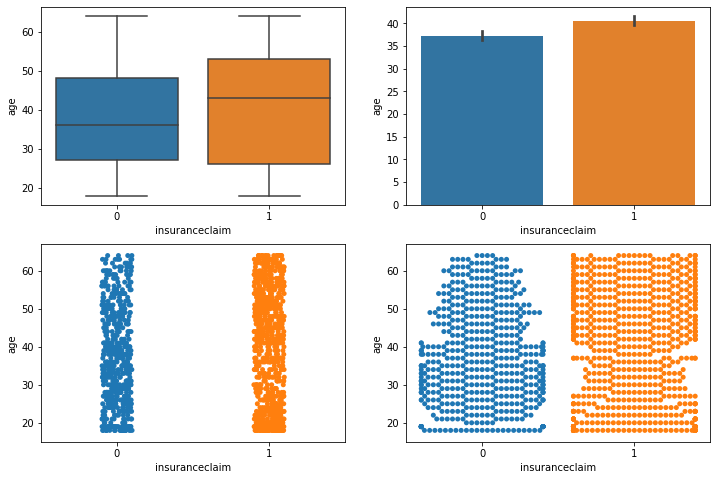

In [28]:
fig, ax2 = plt.subplots(2,2,figsize=(12,8))
sns.boxplot(x='insuranceclaim',y='age',data=df,ax=ax2[0][0])
sns.barplot(df['insuranceclaim'],df['age'],ax=ax2[0][1])
sns.stripplot(df['insuranceclaim'],df['age'],jitter=True,ax=ax2[1][0])
sns.swarmplot(df['insuranceclaim'],df['age'],ax=ax2[1][1])

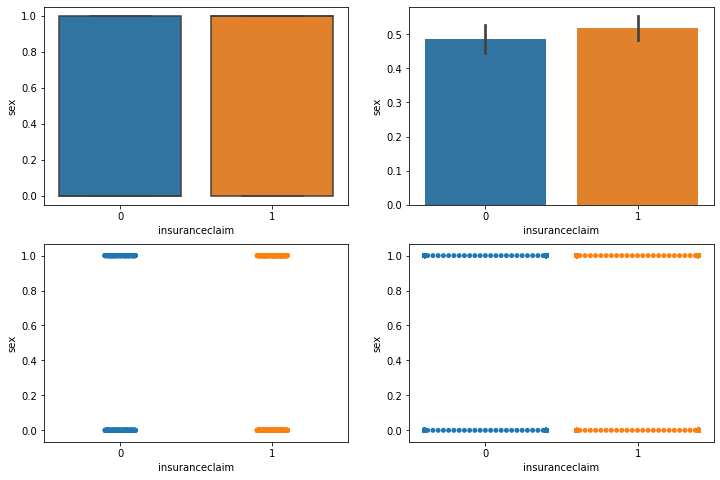

In [29]:
fig, ax2 = plt.subplots(2,2,figsize=(12,8))
sns.boxplot(x='insuranceclaim',y='sex',data=df,ax=ax2[0][0])
sns.barplot(df['insuranceclaim'],df['sex'],ax=ax2[0][1])
sns.stripplot(df['insuranceclaim'],df['sex'],jitter=True,ax=ax2[1][0])
sns.swarmplot(df['insuranceclaim'],df['sex'],ax=ax2[1][1])

In [34]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'insuranceclaim'],
      dtype='object')

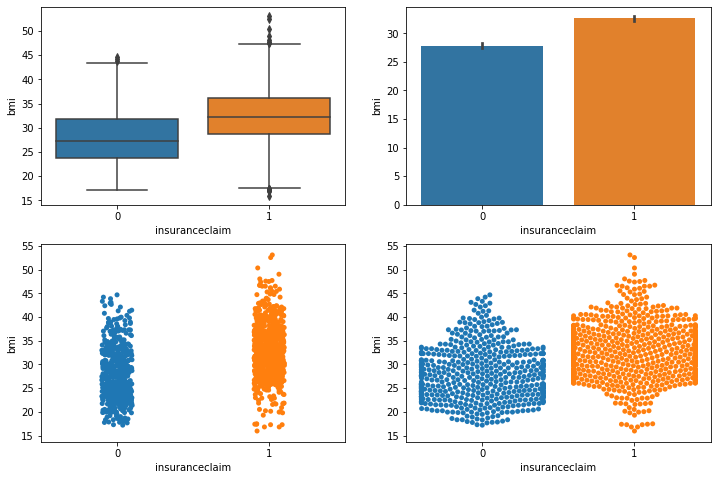

In [36]:
fig, ax2 = plt.subplots(2,2,figsize=(12,8))
sns.boxplot(x='insuranceclaim',y='bmi',data=df,ax=ax2[0][0])
sns.barplot(df['insuranceclaim'],df['bmi'],ax=ax2[0][1])
sns.stripplot(df['insuranceclaim'],df['bmi'],jitter=True,ax=ax2[1][0])
sns.swarmplot(df['insuranceclaim'],df['bmi'],ax=ax2[1][1])

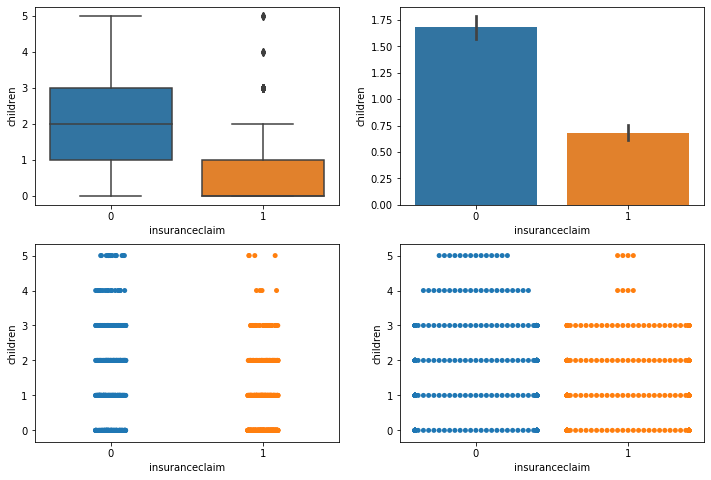

In [37]:
fig, ax2 = plt.subplots(2,2,figsize=(12,8))
sns.boxplot(x='insuranceclaim',y='children',data=df,ax=ax2[0][0])
sns.barplot(df['insuranceclaim'],df['children'],ax=ax2[0][1])
sns.stripplot(df['insuranceclaim'],df['children'],jitter=True,ax=ax2[1][0])
sns.swarmplot(df['insuranceclaim'],df['children'],ax=ax2[1][1])

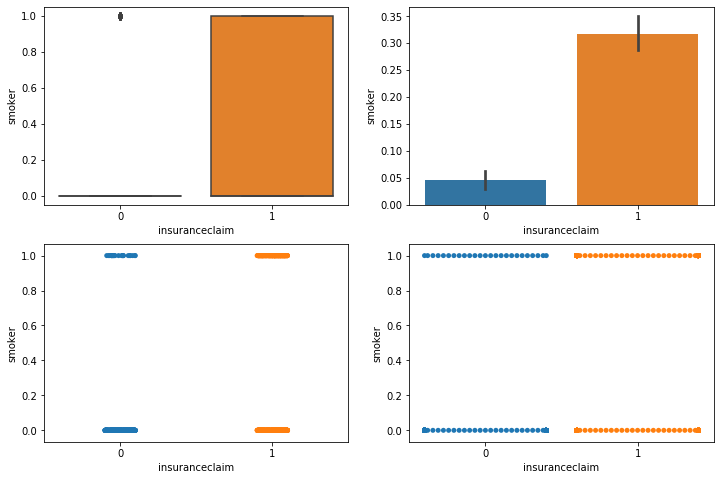

In [38]:
fig, ax2 = plt.subplots(2,2,figsize=(12,8))
sns.boxplot(x='insuranceclaim',y='smoker',data=df,ax=ax2[0][0])
sns.barplot(df['insuranceclaim'],df['smoker'],ax=ax2[0][1])
sns.stripplot(df['insuranceclaim'],df['smoker'],jitter=True,ax=ax2[1][0])
sns.swarmplot(df['insuranceclaim'],df['smoker'],ax=ax2[1][1])

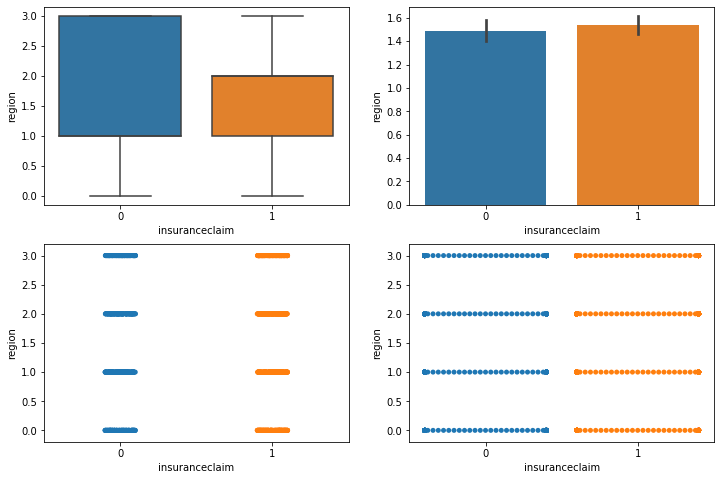

In [42]:
fig, ax2 = plt.subplots(2,2,figsize=(12,8))
sns.boxplot(x='insuranceclaim',y='region',data=df,ax=ax2[0][0])
sns.barplot(df['insuranceclaim'],df['region'],ax=ax2[0][1])
sns.stripplot(df['insuranceclaim'],df['region'],jitter=True,ax=ax2[1][0])
sns.swarmplot(df['insuranceclaim'],df['region'],ax=ax2[1][1])

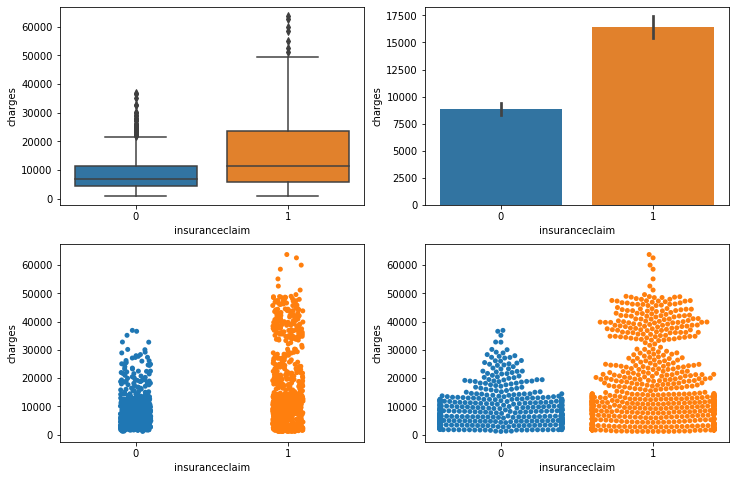

In [40]:
fig, ax2 = plt.subplots(2,2,figsize=(12,8))
sns.boxplot(x='insuranceclaim',y='charges',data=df,ax=ax2[0][0])
sns.barplot(df['insuranceclaim'],df['charges'],ax=ax2[0][1])
sns.stripplot(df['insuranceclaim'],df['charges'],jitter=True,ax=ax2[1][0])
sns.swarmplot(df['insuranceclaim'],df['charges'],ax=ax2[1][1])

### Multivariate Analysis

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000010E2A358>,
      dtype=object)

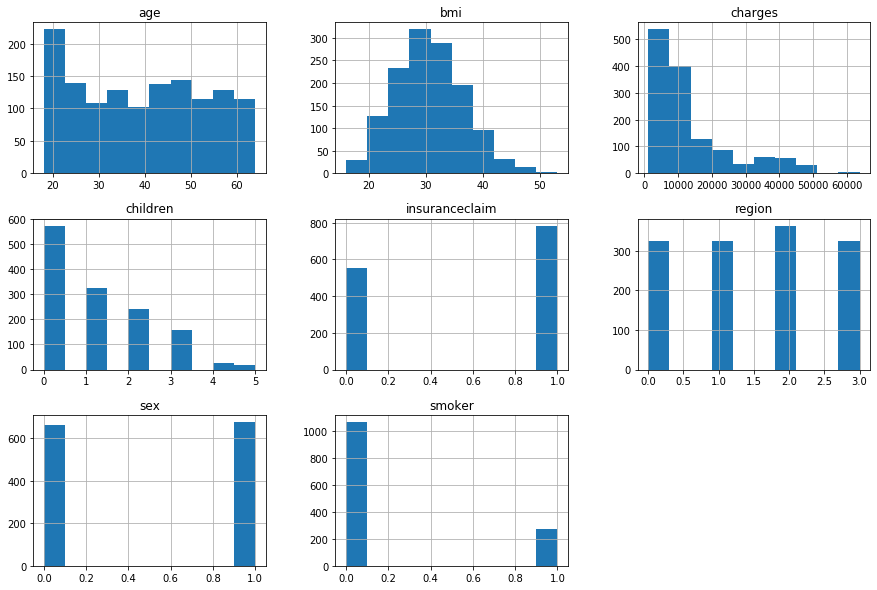

In [55]:
df.hist(figsize=(15,10))

### Observation

it is clerly visible that the data is positivly skewd.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


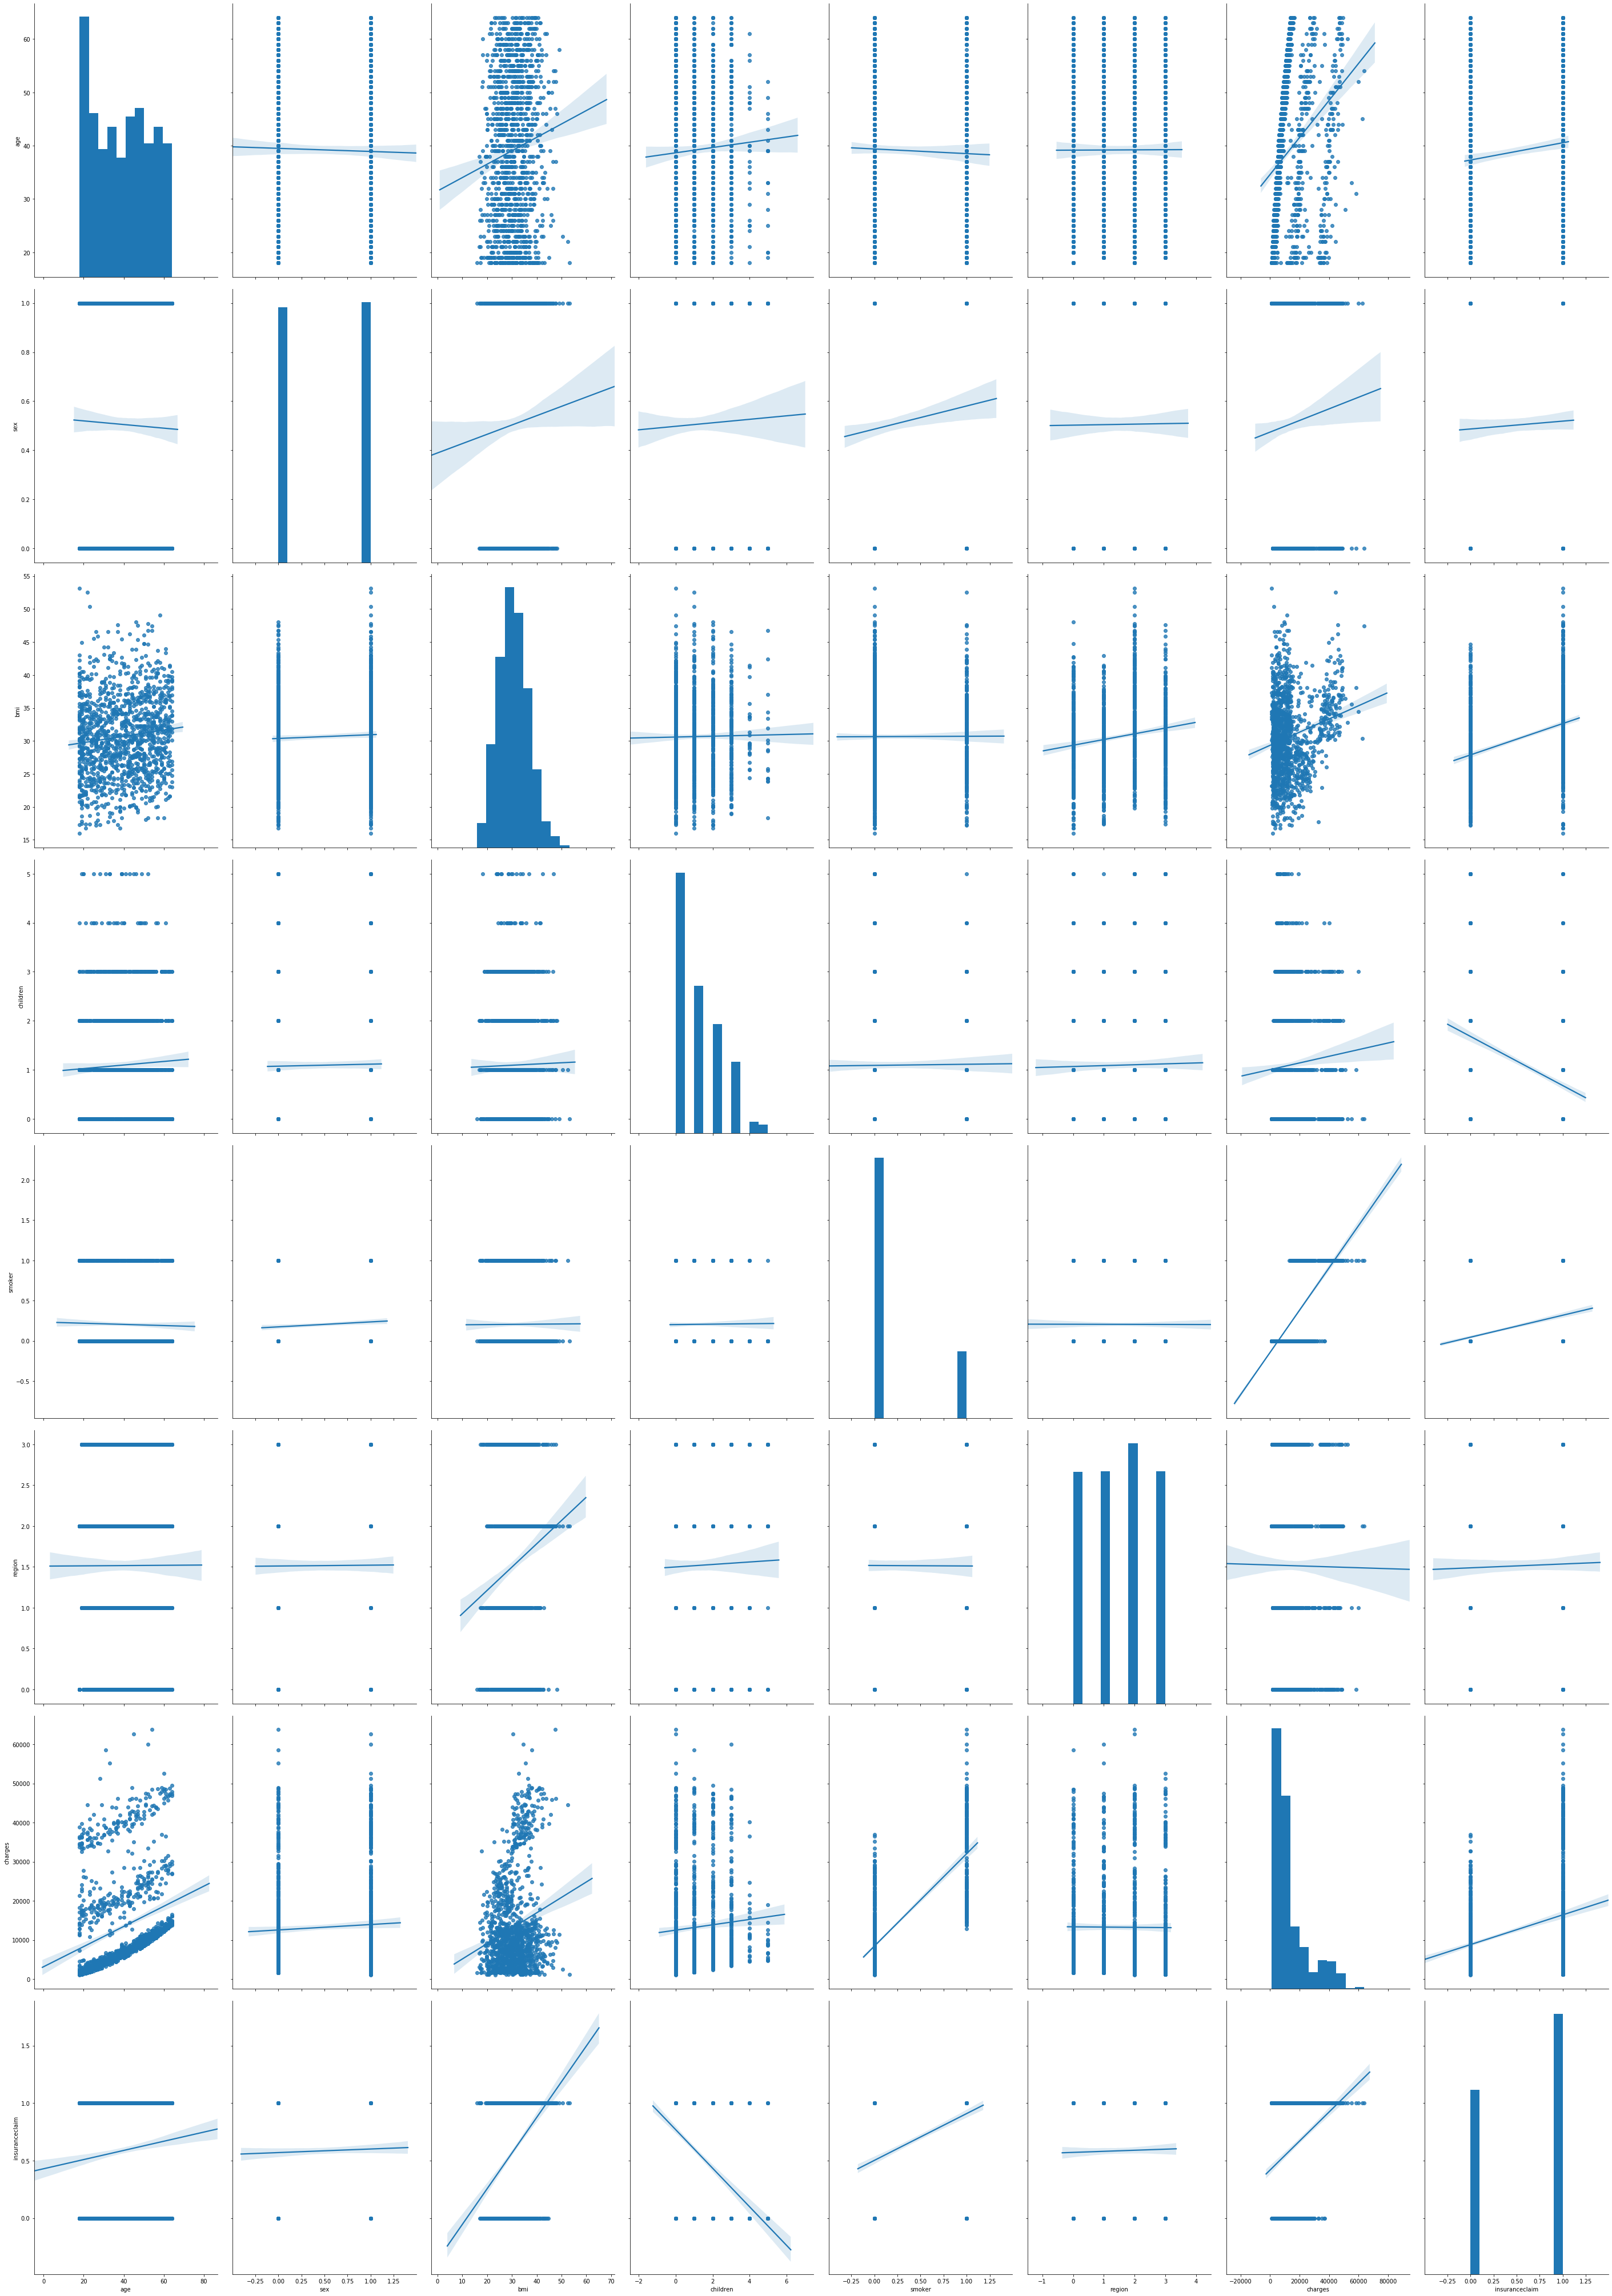

In [56]:
sns.pairplot(df,size=7,aspect=0.7,kind='reg')

# Outliers Removing

In [77]:
from scipy.stats import zscore
z_score=abs(zscore(df))
print(df.shape)
data=df[(z_score<3).all(axis=1)]
print(data.shape)

(1338, 8)
(1309, 8)


In [87]:
data.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [80]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'insuranceclaim'],
      dtype='object')

### Feature selection

In [89]:
#droping the target variables
df=data.drop('insuranceclaim',axis=1)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [90]:
#calculte the correlation matrix b/w the avriables
corr_matrix=df.corr().abs()

In [91]:
#selecting the upper correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))

In [101]:
upper.head()

,age,sex,bmi,children,smoker,region,charges
age,NaN,0.019253,0.118178,0.059100,0.029090,0.003121,0.305263
sex,NaN,NaN,0.042498,0.014056,0.079058,0.003084,0.059455
bmi,NaN,NaN,NaN,0.029916,0.005288,0.160126,0.191453
children,NaN,NaN,NaN,NaN,0.028844,0.002976,0.100438
smoker,NaN,NaN,NaN,NaN,NaN,0.003474,0.785129


In [96]:
#finding index of variables with correlation greater then 0.6
to_drop=[column for column in upper.columns if any (upper[column]>0.6)]

In [97]:
to_drop

['charges']

In [99]:
#droping the avriabels and create the new dataset
new_data=data.drop(data[to_drop],axis=1)

In [102]:
new_data.head()

,age,sex,bmi,children,smoker,region,insuranceclaim
0,19,0,27.900,0,1,3,1
1,18,1,33.770,1,0,2,1
2,28,1,33.000,3,0,2,0
3,33,1,22.705,0,0,1,0
4,32,1,28.880,0,0,1,1


### Split the data x and y variables

In [108]:
x=new_data.drop('insuranceclaim',axis=1)
y=new_data['insuranceclaim']

In [109]:
x.head()

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1


In [110]:
y.head()

0    1
1    1
2    0
3    0
4    1
Name: insuranceclaim, dtype: int64

### Split the data into train and test data

In [112]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [115]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.20)

In [116]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1047, 6)
(1047,)
(262, 6)
(262,)


In [136]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve,auc
from sklearn.neighbors import KNeighborsClassifier

In [138]:
KNN=KNeighborsClassifier()
SV=SVC()
LR=LogisticRegression()
DT=DecisionTreeClassifier()
GNB=GaussianNB()
RF=RandomForestClassifier()
MNB=MultinomialNB()

In [142]:
models=[]
models.append(("KNeighborsClassifier()",KNN))
models.append(("LogisticRegression",LR))
models.append(("SVC",SV))
models.append(("DecissionTreeClassifier",DT))
models.append(("GaussianNB",GNB))
models.append(("RandomForestClassifier",RF))
models.append(("MultinomialNB",MNB))

In [155]:
Model = []
score = []
cvs=[]
rocscore=[]
for name,model in models:
    print("**************************",name,"******************************************")
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print("\n")
    AS=accuracy_score(y_test,pre)
    print("Accuracy_Score=",AS)
    score.append(AS*100)
    print("\n")
    sc=cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()
    print("Cross_Val_Score",sc)
    cvs.append(sc*100)
    print('\n')
    false_positive_rate,true_positive_rate, thresholds= roc_curve(y_test,pre)
    roc_auc=auc(false_positive_rate,true_positive_rate)
    print("roc_auc_score",roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('classification_report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')

************************** KNeighborsClassifier() ******************************************


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


Accuracy_Score= 0.8015267175572519


Cross_Val_Score 0.8136266659549103


roc_auc_score 0.80677945095123


classification_report
               precision    recall  f1-score   support

           0       0.70      0.83      0.76        99
           1       0.88      0.79      0.83       163

    accuracy                           0.80       262
   macro avg       0.79      0.81      0.80       262
weighted avg       0.81      0.80      0.80       262



[[ 82  17]
 [ 35 128]]


************************** LogisticRegression ******************************************


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=

In [144]:
result=pd.DataFrame({'Model':Model,"Accuracy_score":score,"cross_val_score":cvs,"Roc_auc_cure":rocscore})
result

,Model,Accuracy_score,cross_val_score,Roc_auc_cure
0,KNeighborsClassifier(),80.152672,81.362667,80.677945
1,LogisticRegression,87.404580,87.473683,86.704468
2,SVC,81.297710,84.414998,81.399888
3,DecissionTreeClassifier,98.473282,99.082208,98.574704
4,GaussianNB,83.206107,82.656844,85.114953
5,RandomForestClassifier,93.129771,95.485569,94.081924
6,MultinomialNB,76.335878,76.854054,73.247816


In [145]:
cross_val=cross_val_score(DT,x,y,cv=10,scoring='accuracy').mean()

In [148]:
print(cross_val)

0.9915854374633


In [153]:
import pickle
#save the traind model
saved_model=pickle.dumps(DT)
#Load the pickel data
DT_from_pickle=pickle.loads(saved_model)

### Conclusion

In SBI Insurence i am select DecisionTreeClasifier because its give a best results as compare to othe